# PROYECTO EDA COUSINE'S RATING

In [1]:
# Primero hay que importar las librerías necesarias para leer el data set y hacer el modelo predictivo
# Librerías generales
import pandas as pd
import numpy as np

#Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from matplotlib.colors import LinearSegmentedColormap

# Librerías de Procesamiento de datos
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE

# Librerías para calcular el score
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report


In [2]:
# Leamos el dataset que vamos a utilizar para el EDA
df=pd.read_csv('C:/Users/diana/apps/proyectoprogra/proyecto_cocina/data/raw/Cuisine_rating.csv')
df.head()

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No


## Tratamientos de valores faltantes y atípicos

In [3]:
# Ver que columnas contienen valores faltantes y el tipo de datos que contiene [Numéricos, Categóricos]
df.info(),df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User ID         200 non-null    int64  
 1   Area code       200 non-null    int64  
 2   Location        200 non-null    object 
 3   Gender          200 non-null    object 
 4   YOB             200 non-null    int64  
 5   Marital Status  200 non-null    object 
 6   Activity        200 non-null    object 
 7   Budget          200 non-null    int64  
 8   Cuisines        200 non-null    object 
 9   Alcohol         200 non-null    object 
 10  Smoker          200 non-null    object 
 11  Food Rating     200 non-null    int64  
 12  Service Rating  200 non-null    int64  
 13  Overall Rating  200 non-null    float64
 14  Often A S       200 non-null    object 
dtypes: float64(1), int64(6), object(8)
memory usage: 23.6+ KB


(None,
 User ID           0
 Area code         0
 Location          0
 Gender            0
 YOB               0
 Marital Status    0
 Activity          0
 Budget            0
 Cuisines          0
 Alcohol           0
 Smoker            0
 Food Rating       0
 Service Rating    0
 Overall Rating    0
 Often A S         0
 dtype: int64)

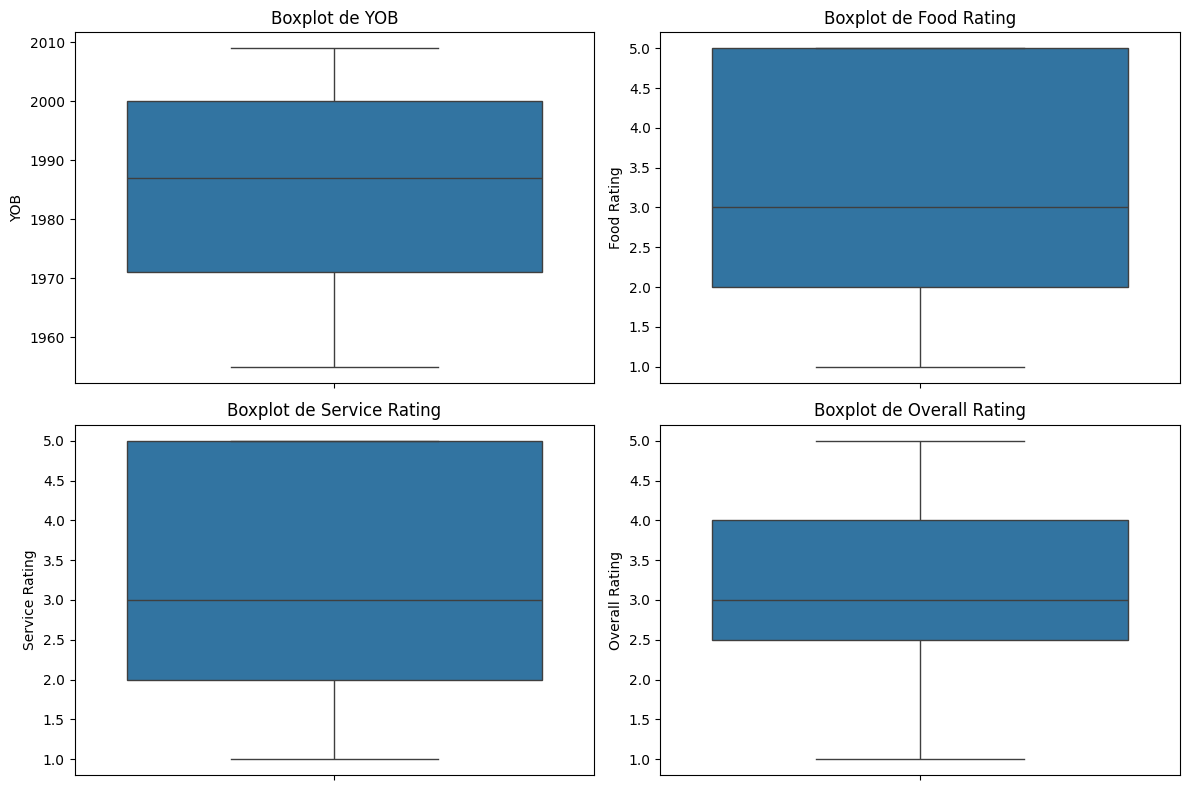

In [4]:
# Solo las columnas de variables cuantitativas pueden tener outliers, asi que hacemos un box plot para ver una representacion visual de estos
variables_atipicas = ['YOB', 'Food Rating', 'Service Rating', 'Overall Rating']

# Visualizar las variables relevantes con diagramas de caja
plt.figure(figsize=(12, 8))
for i, variable in enumerate(variables_atipicas, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df[variable])
    plt.title(f'Boxplot de {variable}')

plt.tight_layout()
plt.show()

# EDA Variables Cuantitativas

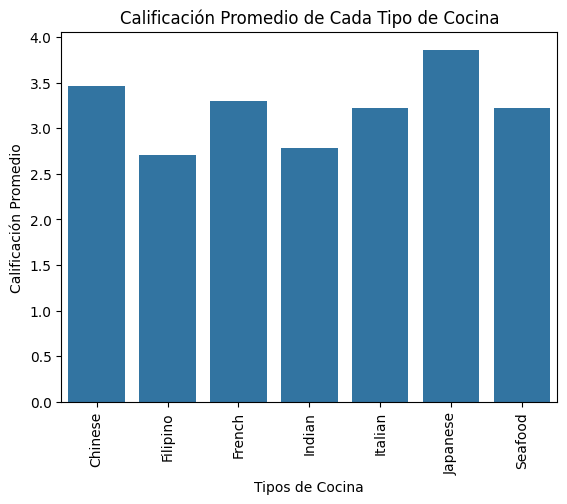

In [5]:
#Veamos cuál es la calificación promedio por el tipo de cocina que sirven

sns.barplot(x='Cuisines', y='Food Rating', data=df.groupby('Cuisines')['Food Rating'].mean().reset_index()) 
# La línea [df.groupby('Cuisines')['Food Rating'].mean()] saca el promedio de las calificaciones de cada tipo de cocina
# El reset index es por que sns no puede plotear df
plt.xticks(rotation=90)  # Este comando rota las etiquetas del eje x para que sean mas fáciles de leer
plt.xlabel('Tipos de Cocina')
plt.ylabel('Calificación Promedio')
plt.title('Calificación Promedio de Cada Tipo de Cocina')
plt.show()

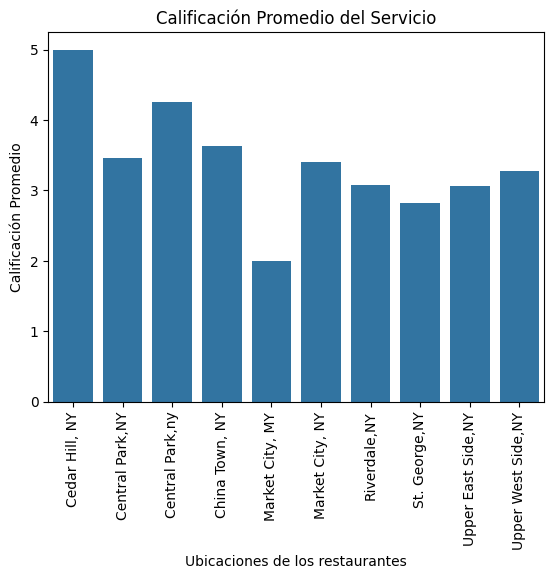

In [6]:
# Veamos que locación ofrece el mejor serivico según las calificaciones de los usuarios

sns.barplot(x='Location', y='Service Rating', data=df.groupby('Location')['Service Rating'].mean().reset_index()) 
# La línea [df.groupby('Cuisines')['Food Rating'].mean()] saca el promedio de las calificaciones de cada tipo de cocina
# El reset index es por que sns no puede plotear df
plt.xticks(rotation=90)  # Este comando rota las etiquetas del eje x para que sean mas fáciles de leer
plt.xlabel('Ubicaciones de los restaurantes')
plt.ylabel('Calificación Promedio')
plt.title('Calificación Promedio del Servicio')
plt.show()

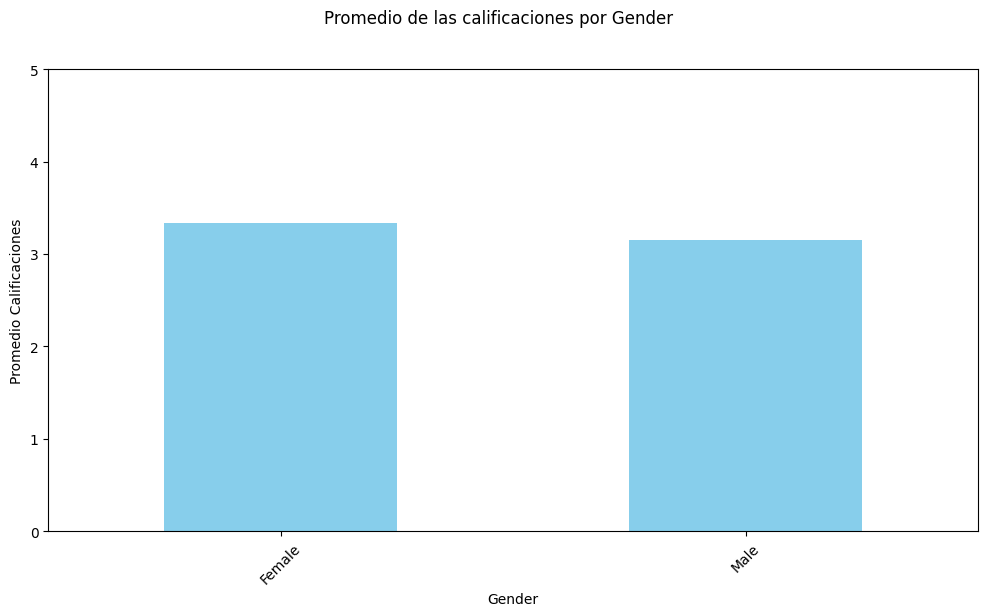

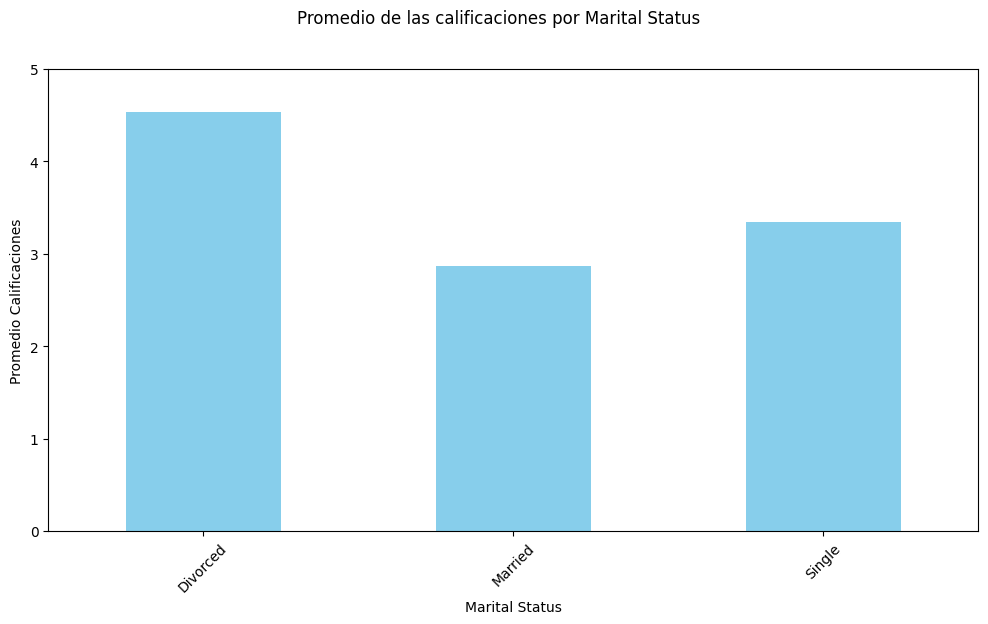

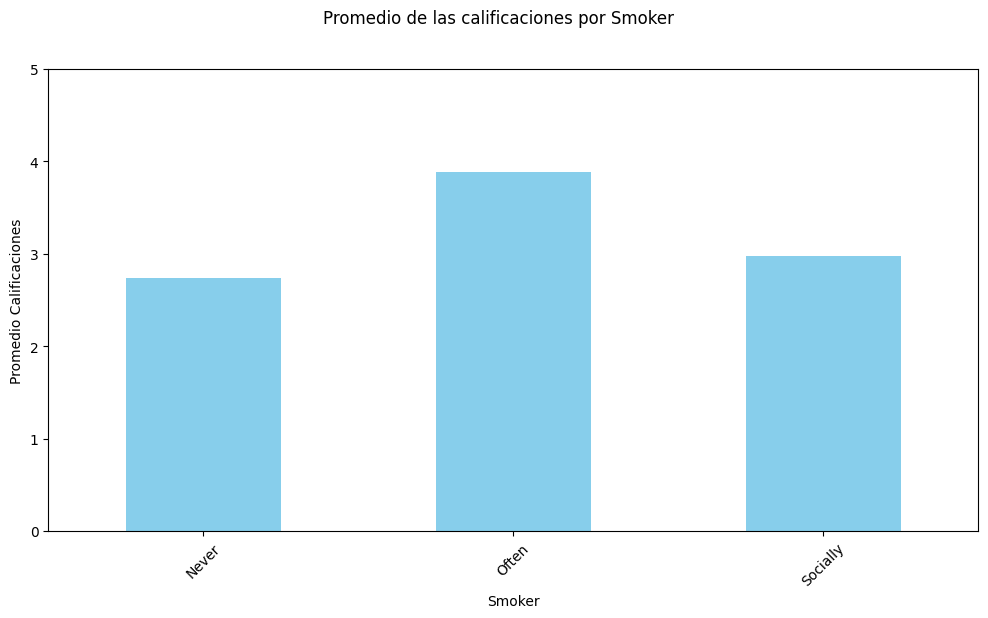

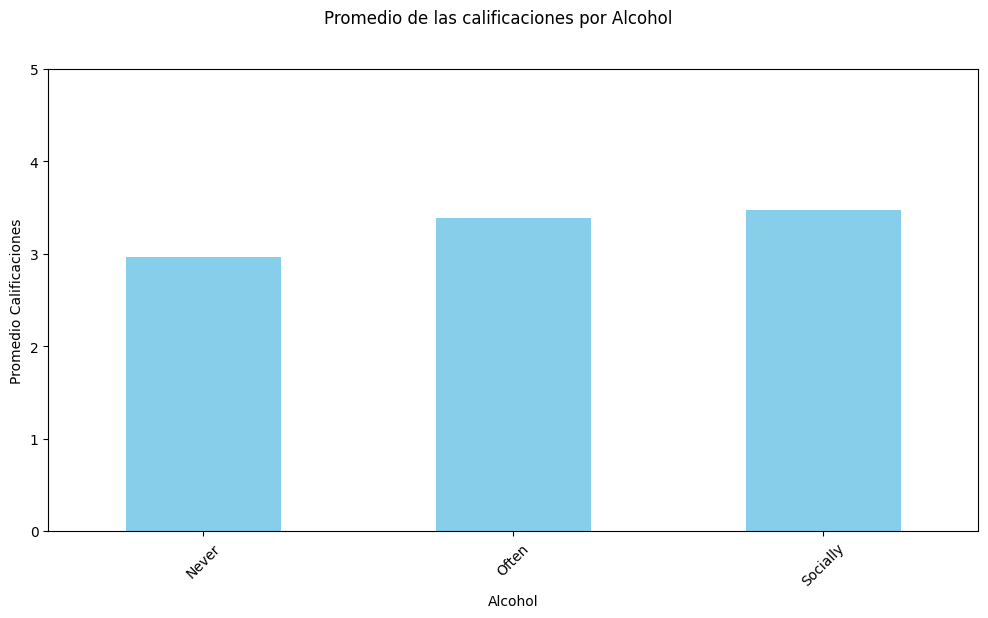

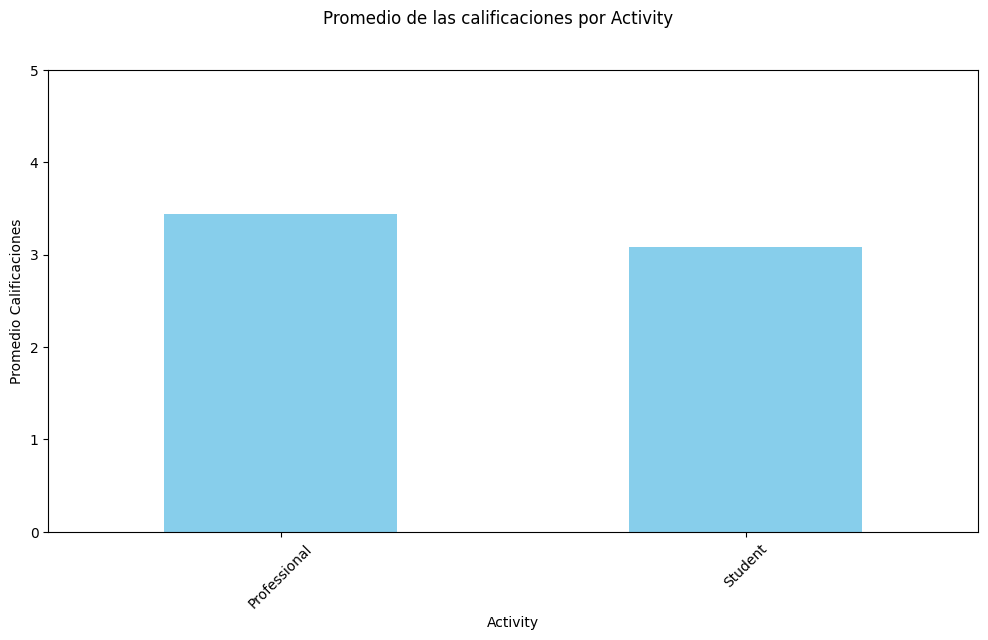

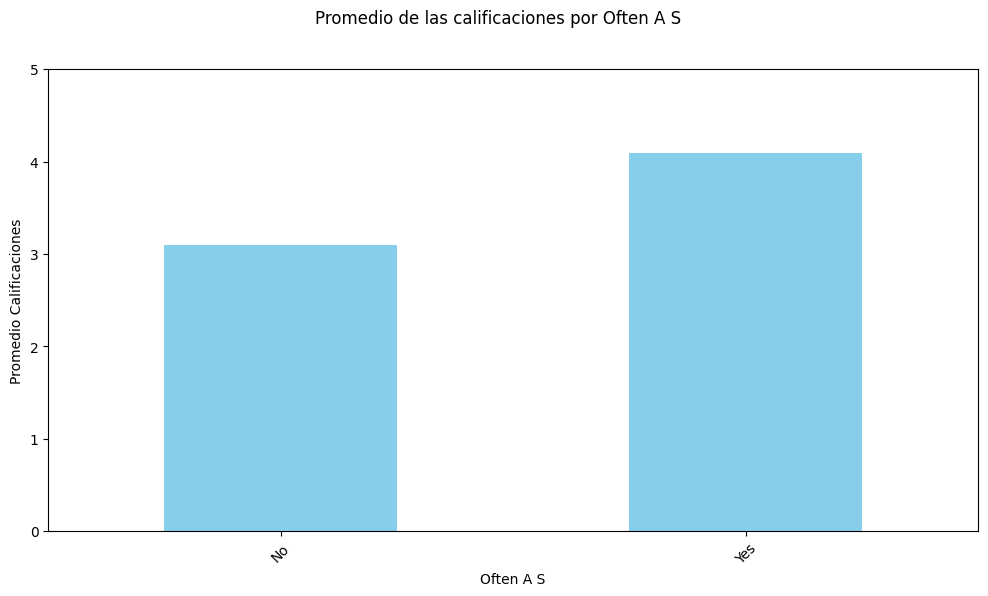

In [7]:
# Separar las cooumnas a las cuáles queremos saber la calificaciópromedio que le dan al tipo de cocina
columnas_categoricas = ['Gender', 'Marital Status', 'Smoker', 'Alcohol', 'Activity', 'Often A S']

for columna in columnas_categoricas:
    # Crear la gráfica
    fig, ax = plt.subplots(figsize=(12, 6))
    fig.suptitle(f'Promedio de las calificaciones por {columna}')
    
    # Obtener el promedio de lacoluma Overall Rating que son las calificacioes para cada valor de la columna categórica
    promedio_rating = df.groupby(columna)['Overall Rating'].mean()
    
    # Graficar
    promedio_rating.plot(kind='bar', ax=ax, color='skyblue')
    
    ax.set_xlabel(columna)
    ax.set_ylabel('Promedio Calificaciones')

    # Ajustar el rango del eje y, esto para que todas las graficas tenngann el mismo rango en y incluyendo los datos float
    ax.set_ylim(0, 5)
    
    # Ajustes al formato
    plt.xticks(rotation=45) #Gira las etiquetas del gráfico para que sean más faciles de leer y no se pongan unas encima de otras
    plt.show()

## EDA Variables Cualitativas

In [8]:
for columna in columnas_categoricas: # La variable columnas categóricas esta definida arriba
    print(f"Frecuencia de valores en la columna '{columna}':")
    print(df[columna].value_counts()) # Cual es la frecuencia de cada valor único en una columna
    print()  #Separa cada iteración del bucel para que se vea mejor

Frecuencia de valores en la columna 'Gender':
Gender
Male      118
Female     82
Name: count, dtype: int64

Frecuencia de valores en la columna 'Marital Status':
Marital Status
Single      100
Married      86
Divorced     14
Name: count, dtype: int64

Frecuencia de valores en la columna 'Smoker':
Smoker
Socially    71
Often       70
Never       59
Name: count, dtype: int64

Frecuencia de valores en la columna 'Alcohol':
Alcohol
Never       88
Often       61
Socially    51
Name: count, dtype: int64

Frecuencia de valores en la columna 'Activity':
Activity
Student         120
Professional     80
Name: count, dtype: int64

Frecuencia de valores en la columna 'Often A S':
Often A S
No     174
Yes     26
Name: count, dtype: int64



C:\Users\diana\AppData\Local\Temp\ipykernel_15164\3317569536.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=df['Location'], palette='mako')


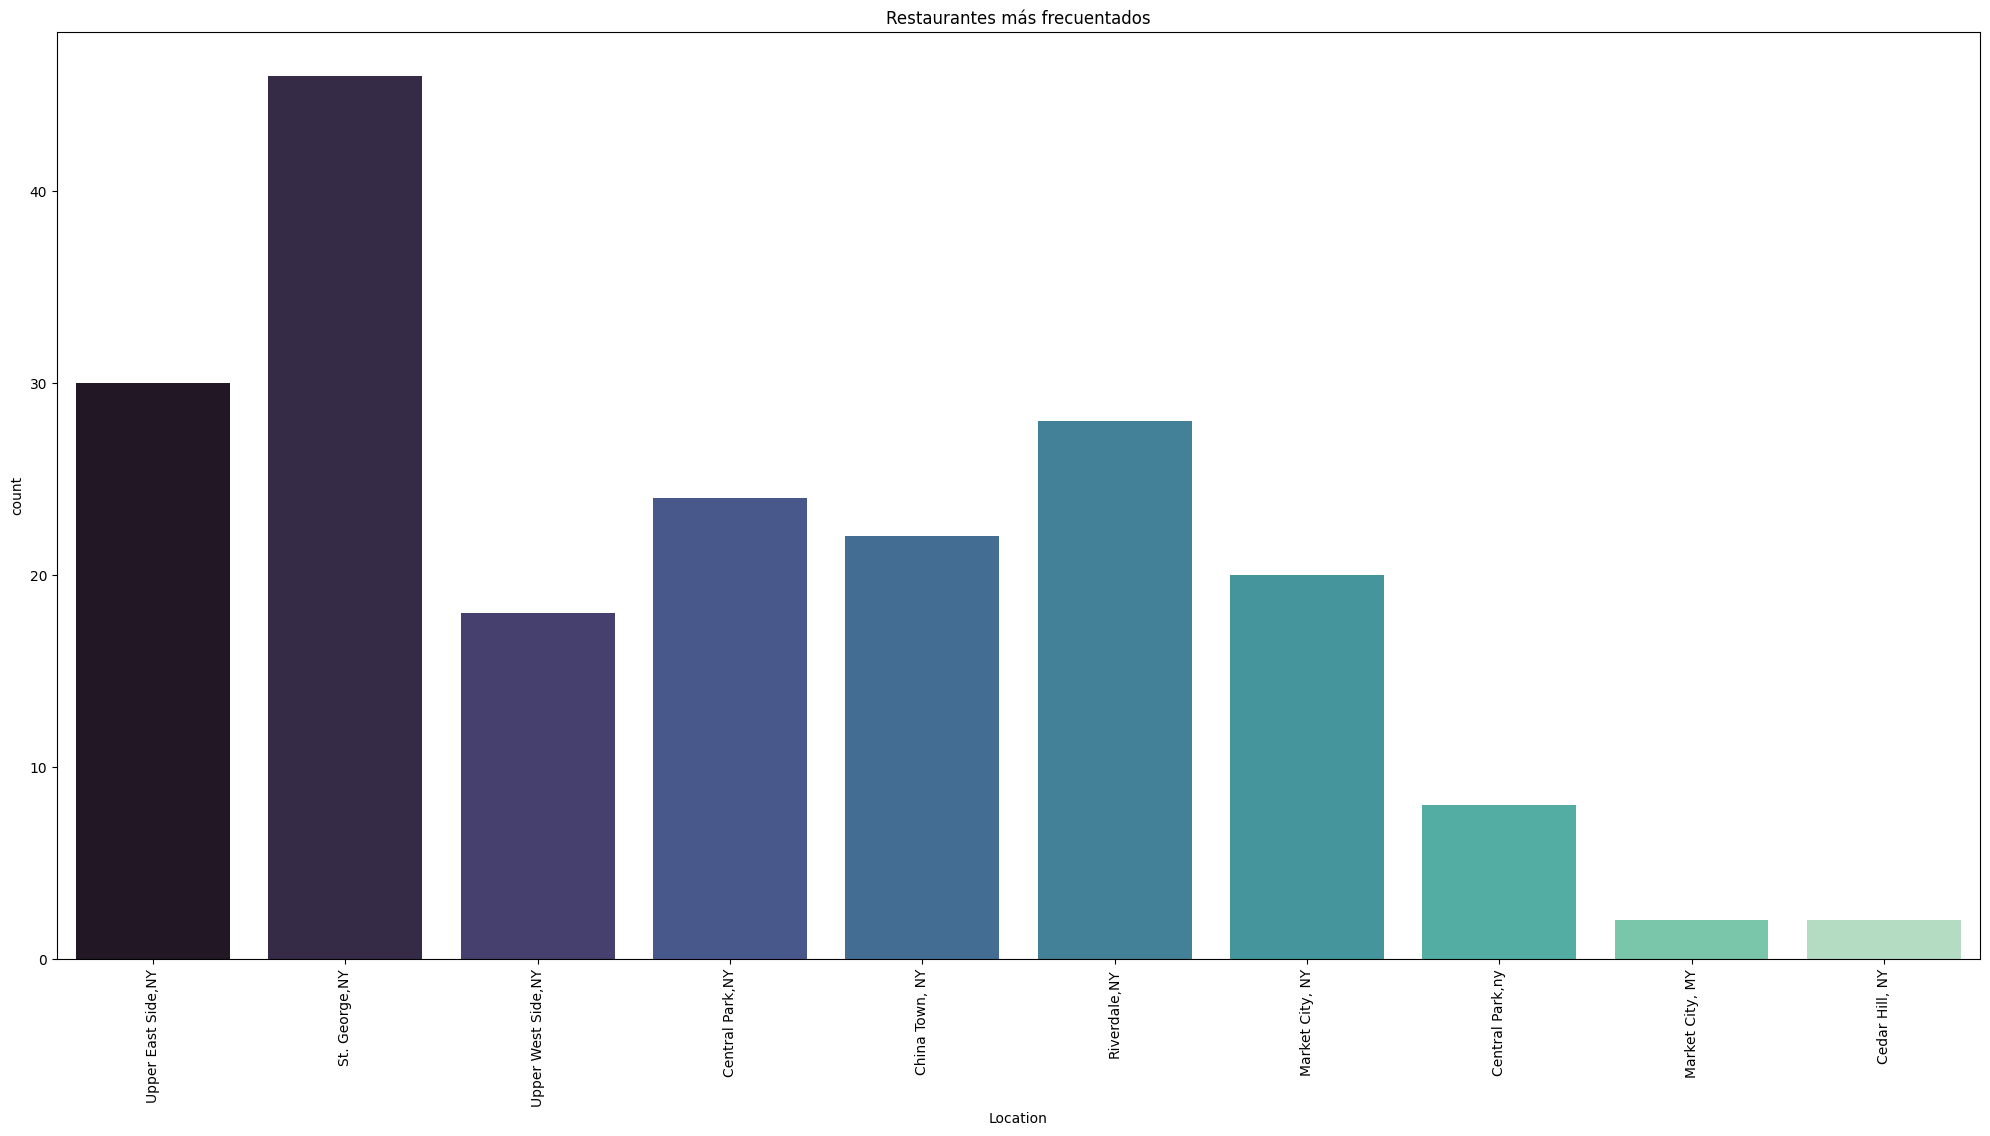

In [9]:
# Veamos que restaurantes son los más "polualres", osea los más frecuentes en el df
plt.figure(figsize=(20,10))
sns.countplot(data=df, x=df['Location'], palette='mako')
plt.tight_layout()
plt.title('Restaurantes más frecuentados')
plt.xticks(rotation=90)
plt.show()

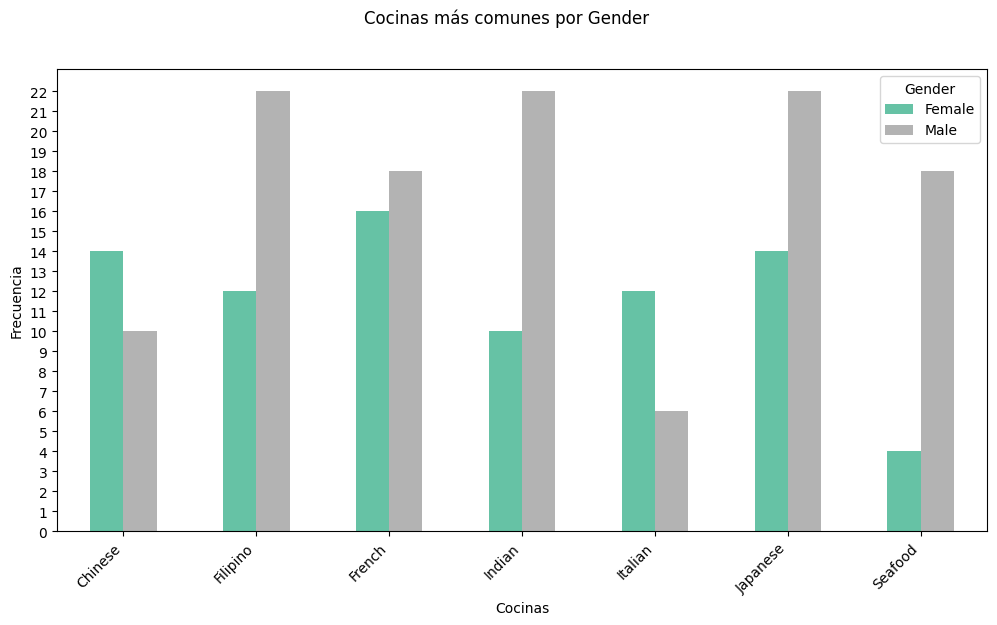

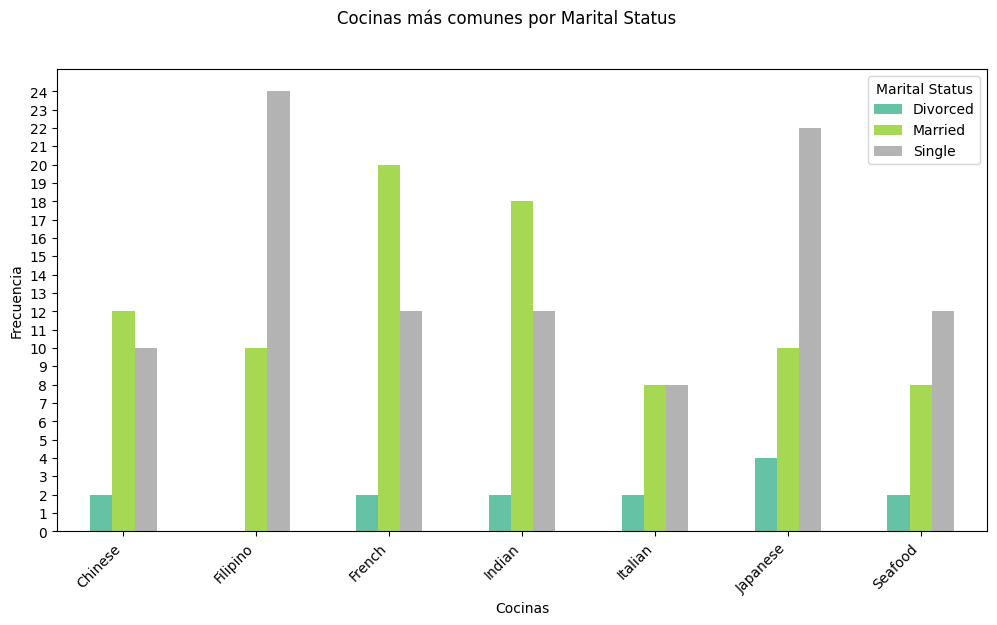

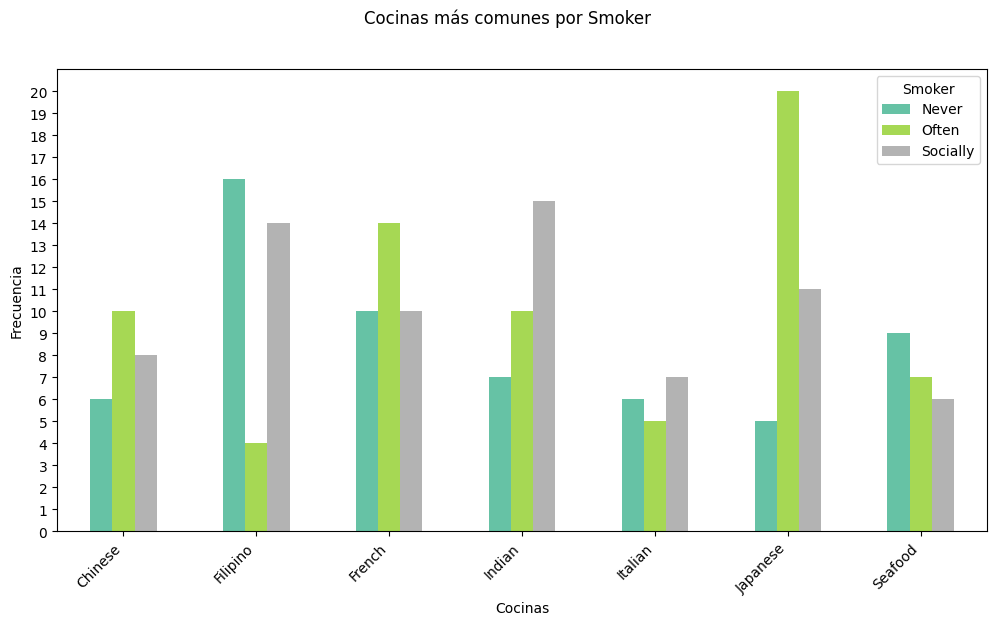

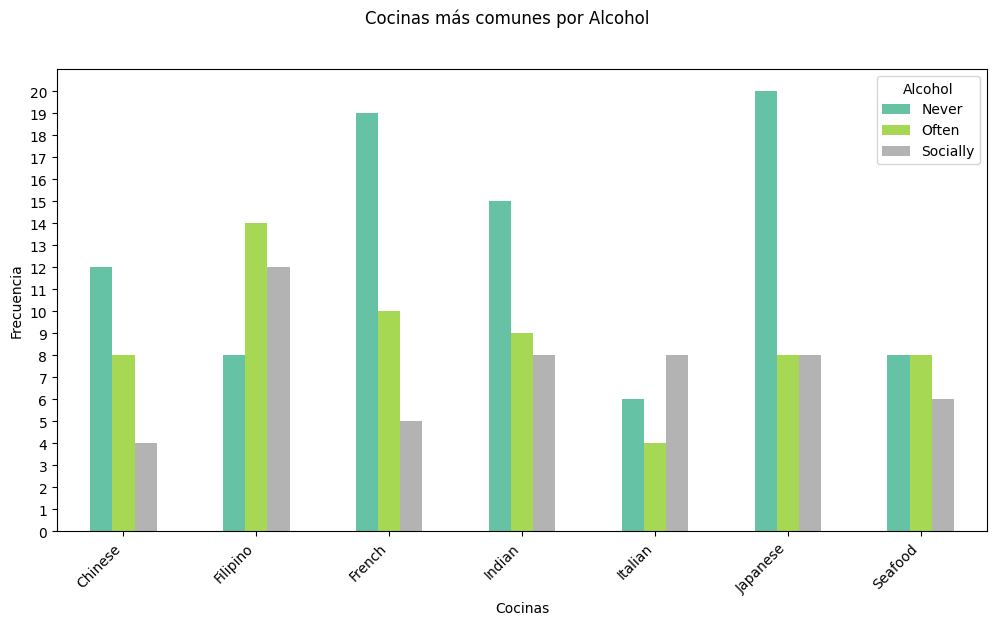

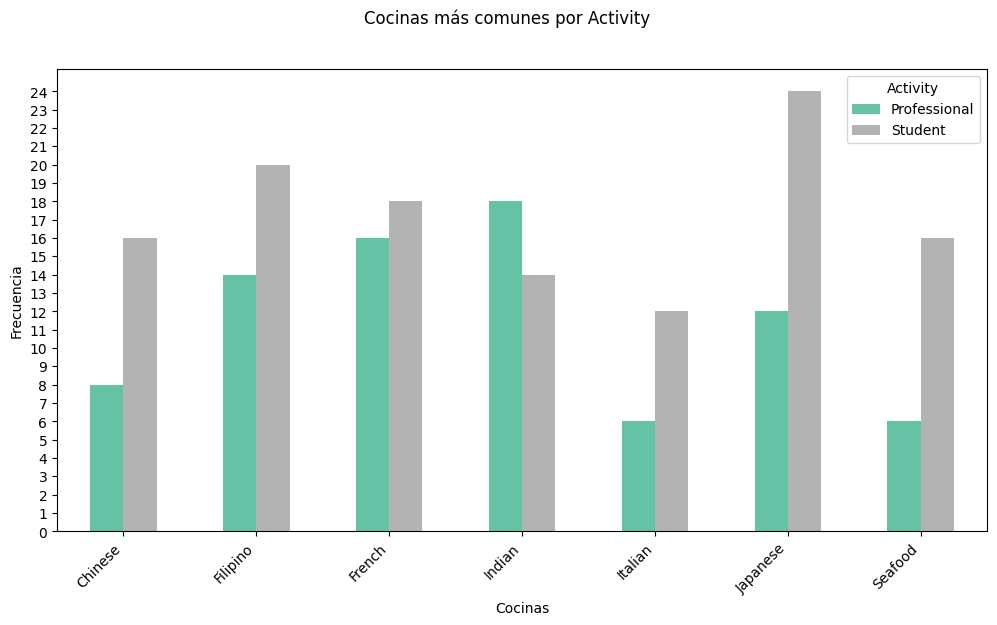

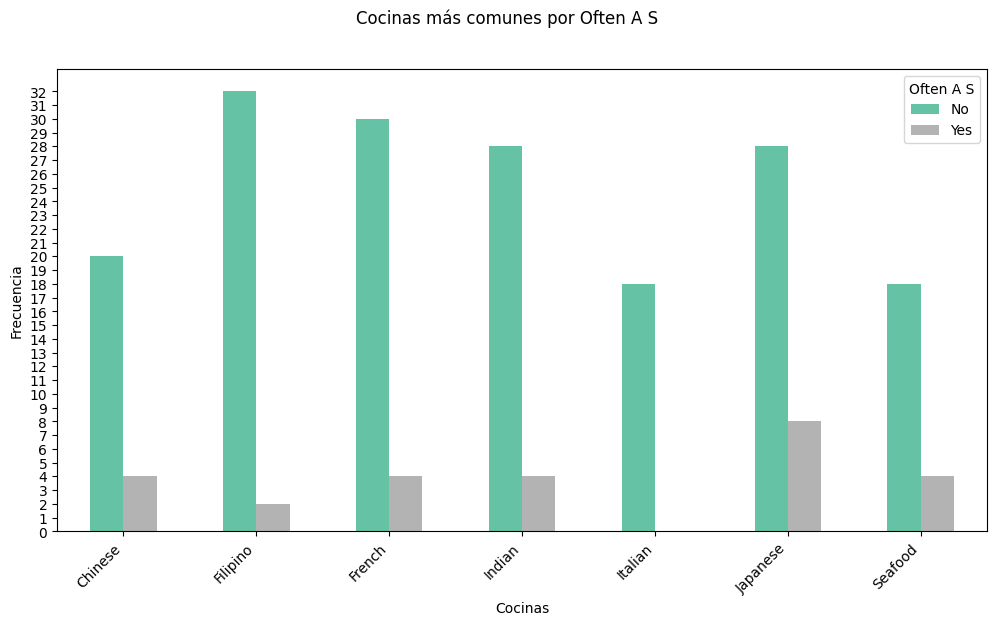

In [10]:
for columna in columnas_categoricas:
    # Crear un subplot
    fig, ax = plt.subplots(figsize=(12, 6)) #Determinar el tamaño de nuestra gráfica
    fig.suptitle(f'Cocinas más comunes por {columna}')
    
    # Obtener la frecuencia de cada cocina para cada valor de la columna categórica
    cocinas_frecuencia = df.groupby(['Cuisines', columna]).size().unstack() 
     #El parámetro unstack es para que agarre como etiquetas de x los tipos de cocina y no los valores de la columna que itera
    
    # Graficar
    cocinas_frecuencia.plot(kind='bar', stacked=False, ax=ax, cmap='Set2')
        # Se utiliza el parámetro stacked=False ya que si no, en vez de que las barras esten separadas unas de otras, estas aparecen apiladas
    
    ax.set_xlabel('Cocinas')
    ax.set_ylabel('Frecuencia')
    ax.legend(title=columna)
    
    # Ajustes de diseño
    plt.xticks(rotation=45, ha='right') # ha='right' --> Ajusta las etiquetas para que no se tapen con la gráfica
    plt.yticks(range(int(cocinas_frecuencia.max().max()) + 1)) # Esto es para ajustar la escala del eje y, y se personalice para cada columna
    plt.show()

# Modelo de Clasificación/Agrupación KNeighbors

### Pre-procesamiento de los datos

In [11]:
# Redondear los valores de 'Overall Rating'
df['Overall Rating']=df['Overall Rating'].round().astype('int64')
df

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,175,"St. George,NY",Female,1982,Single,Professional,4,French,Never,Socially,1,2,2,No
196,197,170,"Upper West Side,NY",Female,2000,Married,Student,4,Chinese,Never,Often,1,2,2,No
197,198,160,"St. George,NY",Female,2006,Single,Professional,5,Japanese,Never,Often,5,2,4,No
198,199,130,"St. George,NY",Male,2002,Married,Student,3,Filipino,Never,Socially,3,2,2,No


In [12]:
# Crear una columna de edad para sustituir la columna de YOB que es el año de nacimiento
df['Age'] = 2024 - df['YOB']
df

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S,Age
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4,No,18
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1,No,33
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5,Yes,47
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2,No,68
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3,No,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,175,"St. George,NY",Female,1982,Single,Professional,4,French,Never,Socially,1,2,2,No,42
196,197,170,"Upper West Side,NY",Female,2000,Married,Student,4,Chinese,Never,Often,1,2,2,No,24
197,198,160,"St. George,NY",Female,2006,Single,Professional,5,Japanese,Never,Often,5,2,4,No,18
198,199,130,"St. George,NY",Male,2002,Married,Student,3,Filipino,Never,Socially,3,2,2,No,22


### Tratamiento y codificación de las variables categóricas

In [13]:
# Aplicamos un OrdinalEncoder a las columnas donde hay un tipo de orden/jerarquía que indice que algo tiene más relevancia que otro
# La única columna que presenta un tipo de orden es Maritual Status
ordinal_encoder = OrdinalEncoder()
df['Marital Status Encoded'] = ordinal_encoder.fit_transform(df[['Marital Status']])
df

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S,Age,Marital Status Encoded
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4,No,18,2.0
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1,No,33,1.0
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5,Yes,47,2.0
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2,No,68,1.0
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3,No,27,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,175,"St. George,NY",Female,1982,Single,Professional,4,French,Never,Socially,1,2,2,No,42,2.0
196,197,170,"Upper West Side,NY",Female,2000,Married,Student,4,Chinese,Never,Often,1,2,2,No,24,1.0
197,198,160,"St. George,NY",Female,2006,Single,Professional,5,Japanese,Never,Often,5,2,4,No,18,2.0
198,199,130,"St. George,NY",Male,2002,Married,Student,3,Filipino,Never,Socially,3,2,2,No,22,1.0


In [14]:
# Nos deshacemos de las columnas que no son relevantes para el df por las siguientes razones:
    # 1- User Id es un contador de filas, no indica nada 
    # 2- Nos deshacemos de Area Code ya que nos quedamos con Location y brindan la misma información
    # 3- Yob la codifcicamos para que nos diera la edad del cliente, es inecesaria aplica lo mismo para Marital Status
    # 4- Food y Service rating son columnas que su promedio genera la target, por lo tanto se descartan
df=df.drop(['User ID','Area code','YOB','Food Rating','Service Rating', 'Marital Status'],axis=1)
df

,Location,Gender,Activity,Budget,Cuisines,Alcohol,Smoker,Overall Rating,Often A S,Age,Marital Status Encoded
0,"Upper East Side,NY",Female,Professional,3,Japanese,Never,Never,4,No,18,2.0
1,"St. George,NY",Female,Student,3,Indian,Never,Socially,1,No,33,1.0
2,"Upper West Side,NY",Male,Student,5,Seafood,Often,Often,5,Yes,47,2.0
3,"Upper East Side,NY",Female,Professional,5,Japanese,Never,Socially,2,No,68,1.0
4,"Central Park,NY",Male,Student,4,Filipino,Socially,Never,3,No,27,2.0
...,...,...,...,...,...,...,...,...,...,...,...
195,"St. George,NY",Female,Professional,4,French,Never,Socially,2,No,42,2.0
196,"Upper West Side,NY",Female,Student,4,Chinese,Never,Often,2,No,24,1.0
197,"St. George,NY",Female,Professional,5,Japanese,Never,Often,4,No,18,2.0
198,"St. George,NY",Male,Student,3,Filipino,Never,Socially,2,No,22,1.0


In [15]:
# El modelo KNN solo usa variables numéricas asi que aplicamos codificación One Hot a las variables categóricas 
df_onehot=pd.get_dummies(df).astype('int64')
df_onehot

,Budget,Overall Rating,Age,Marital Status Encoded,"Location_Cedar Hill, NY","Location_Central Park,NY","Location_Central Park,ny","Location_China Town, NY","Location_Market City, MY","Location_Market City, NY",...,Cuisines_Japanese,Cuisines_Seafood,Alcohol_Never,Alcohol_Often,Alcohol_Socially,Smoker_Never,Smoker_Often,Smoker_Socially,Often A S_No,Often A S_Yes
0,3,4,18,2,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,1,0
1,3,1,33,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
2,5,5,47,2,0,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,1
3,5,2,68,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,1,0
4,4,3,27,2,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,4,2,42,2,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
196,4,2,24,1,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
197,5,4,18,2,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,1,0
198,3,2,22,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0


### Parámetros del modelado

In [16]:
# Establecemos los parámetros del modelado
x = df_onehot.drop(columns=['Overall Rating']) # Independientes
y = df_onehot['Overall Rating'] # Target

In [17]:
# Los datos deben de tener la misma distancia para que la precisión del modelo sea la óptima, hagamos un MinMax ya que la mayoría...
    # De nuestras columnas son One-Hot encoded, asi que sus valores son 0 o 1.
scaler = MinMaxScaler()
X = scaler.fit_transform(x)

### Técnica SMOTE [Oversampling]

##### El dataset que tenemos tiene un Oversampling en las clases, esto quiere decir que una o más clases presentan un desbalance en comparación con las otras, la clase *1* es 10 veces mas chica que la clase 4 y 2, esto genera que el modelado tenga algún tipo de sesgo y esto afecta la precisión, asi que usaremos una técnica llamada SMOTE para corregirlo.

In [18]:
y.value_counts()

Overall Rating
4    67
2    64
3    34
5    29
1     6
Name: count, dtype: int64

In [19]:
# Smote funciona como un kneighbors, lo que hace es crear datos que tengan las caracteristicas de la clase menor balanceada
smote = SMOTE(random_state=707)
X_smote, y_smote = smote.fit_resample(X, y)

c:\Users\diana\anaconda3\envs\progradatos1\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] El sistema no puede encontrar el archivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\diana\anaconda3\envs\progradatos1\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\diana\anaconda3\envs\progradatos1\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\diana\anaconda3\envs\progradatos1\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\diana\anaconda3\envs\progradatos1\lib\subprocess.py", line 1456, in _execute_child
    hp,

In [20]:
# El dataframe original tenia 200 instancias, veamos cuantas tiene después del balanceo de SMOTE
X_smote.shape, y_smote.shape

((335, 32), (335,))

### Preparación para el Modelado

In [21]:
# Como no tenemos un df de testeo, separemos el que tenemos en 4
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=707, stratify=y_smote)

In [22]:
X_train.shape, y_train.value_counts(),y_test.value_counts(),X_test.shape

((268, 32),
 Overall Rating
 5    54
 1    54
 3    54
 2    53
 4    53
 Name: count, dtype: int64,
 Overall Rating
 2    14
 4    14
 5    13
 3    13
 1    13
 Name: count, dtype: int64,
 (67, 32))

In [23]:
# Usando la librería de GridSearch, buscamos los parámetros de nuestro modelo de clasificación que generen el mejor score, así ...
    # Evitamos hacer la búsqueda manualmente

parametros = {
    'n_neighbors': list(range(3,11)),  # Diferentes valores para el número de vecinos
    'weights': ['uniform', 'distance'],  # Diferentes métodos de ponderación
    'metric': ['euclidean', 'manhattan', 'chebyshev'] 
}

knn_parametros = KNeighborsClassifier()

# Crear un objeto GridSearchCV
grid_search = GridSearchCV(knn_parametros, parametros, cv=5)

# Entrenar el modelo con los datos después de aplicar SMOTE
grid_search.fit(X_train, y_train)
mejores_hiperparametros = grid_search.best_params_
print("Mejores hiperparámetros:", mejores_hiperparametros)

Mejores hiperparámetros: {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}


In [24]:
# Crear un modelo KNN con el número de vecinos especificado
knn_model = KNeighborsClassifier(**mejores_hiperparametros) # Aumotáticamente pasa los mejores parámetros a la función

# Realizar validación cruzada y obtener los puntajes de rendimiento
scores = cross_val_score(knn_model, X_train, y_train, cv=5).mean()  # cv=5 indica 5 folds para la validación cruzada

# Puntaje de CV
print("Puntaje promedio de validación cruzada:", scores)

Puntaje promedio de validación cruzada: 0.8243186582809224


### Finalmente realizar el modelo de clasificación

In [25]:
# Crear y entrenar el modelo KNN con los mejores hiperparámetros
knn_classifier = KNeighborsClassifier(**mejores_hiperparametros)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=4, weights='distance')

In [26]:
# Realizar predicciones en el conjunto de prueba
y_pred = knn_classifier.predict(X_test)
# Calcular el score de predicción en el conjunto de prueba
accuracy = accuracy_score(y_test, y_pred)
print("Score de predicción en el conjunto de prueba:", accuracy)

Score de predicción en el conjunto de prueba: 0.9552238805970149


In [27]:
# Obtener los valores únicos en y_test
unique_values_y_test = np.unique(y_test)
print("Valores únicos en y_test:", unique_values_y_test)

# Obtener los valores únicos en y_pred
unique_values_y_pred = np.unique(y_pred)
print("Valores únicos en y_pred:", unique_values_y_pred)

Valores únicos en y_test: [1 2 3 4 5]
Valores únicos en y_pred: [1 2 3 4 5]


## Visualización del Modelo

In [28]:
# Según varios artículos, la mejor forma de ver si el modelo de clasificación realmente funciona es con la matriz de confusión
print("Matriz de confusión:\n")
print(confusion_matrix(y_test, y_pred))

Matriz de confusión:

[[13  0  0  0  0]
 [ 0 14  0  0  0]
 [ 0  1 11  1  0]
 [ 0  0  1 13  0]
 [ 0  0  0  0 13]]


In [29]:
# Esto es opcional, pero si quieres ver los porcentajes y no interpretar los números, hagamos un reporte con la librería
print("Reporte con Porcentajes:\n")
print(classification_report(y_test, y_pred))

Reporte con Porcentajes:

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       0.93      1.00      0.97        14
           3       0.92      0.85      0.88        13
           4       0.93      0.93      0.93        14
           5       1.00      1.00      1.00        13

    accuracy                           0.96        67
   macro avg       0.96      0.95      0.95        67
weighted avg       0.95      0.96      0.95        67



#### Hay que modificar la dimensioanlidad para poder realizar una gráfica, lo haremos en R3 ya que en R2 algunos puntos estan sobrepuestos y no se distinguen

In [30]:
x_embedded = TSNE(n_components=3, learning_rate='auto', init='random', perplexity=10, random_state=707).fit_transform(X_test)

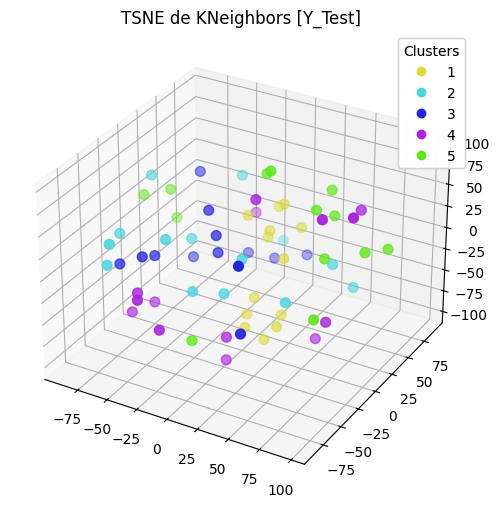

In [31]:
# Paleta de colores personalizada
colors = ['#DCDA36', '#48D5E0', '#2323E0', '#AA23E0', '#5DE818']

# Crear una figura 3D
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos con etiquetas y tamaño de los marcadores más grandes
cmap_custom = LinearSegmentedColormap.from_list('custom_cmap', colors, N=len(colors))
scatter = ax.scatter(
    xs=x_embedded[:, 0], 
    ys=x_embedded[:, 1],
    zs=x_embedded[:, 2],
    c=y_test,
    cmap=cmap_custom,  # Herramienta para poder asignar los colores manualmente a los labels
    s=50  # Tamaño de los marcadores
)

# Crear una leyenda manualmente
legend = ax.legend(*scatter.legend_elements(), title="Clusters")

# Agregar la leyenda al subplot
ax.add_artist(legend)

plt.title('TSNE de KNeighbors [Y_Test]')
plt.show()

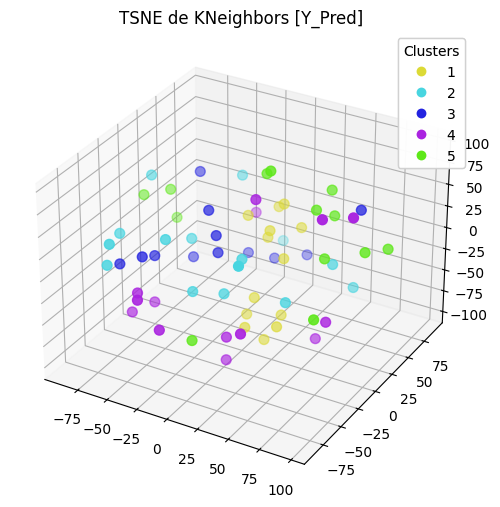

In [32]:
# Paleta de colores personalizada
colors = ['#DCDA36', '#48D5E0', '#2323E0', '#AA23E0', '#5DE818']
cmap_custom = LinearSegmentedColormap.from_list('custom_cmap', colors, N=len(colors))

# Crear una figura 3D
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

# Graficar los puntos con etiquetas y tamaño de los marcadores más grandes
scatter = ax.scatter(
    xs=x_embedded[:, 0], 
    ys=x_embedded[:, 1],
    zs=x_embedded[:, 2],
    c=y_pred,
    cmap=cmap_custom, # Herramienta para poder asignar los colores manualmente a los labels
    s=50  # Tamaño de los marcadores
)

# Crear una leyenda manualmente
legend = ax.legend(*scatter.legend_elements(), title="Clusters")

# Agregar la leyenda al subplot
ax.add_artist(legend)

plt.title('TSNE de KNeighbors [Y_Pred]')
plt.show()